In [183]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
#Desde Drive
datos = pd.read_csv('/content/drive/Othercomputers/Mi portátil/2022/2024-1/Electivo Machine Learning - Deep Learning/Proyecto de asignatura/Datos/Modelos/DataOtonoInvierno.csv')

**PREPROCESAMIENTO**

In [192]:
datos

,Cantidad Cielo cubierto 12:00,Cantidad Cielo cubierto 18:00,Cantidad Cielo cubierto 00:00,Cantidad de cielo cubierto Media diaria,Humedad Relativa del aire 12:00,Humedad Relativa del aire 18:00,Humedad Relativa del aire 00:00,Humedad Relativa Del aire Media diaria,T. Minima,T.Minima Hora Local,...,Presion QFE 00,Presion QFE Media diaria,Precipitación (12-18),Precipitación (18-00),Precipitación (00-06),Precipitación (06-12),Precipitación Diaria,año,mes,dia
0,1.0,2.0,0.0,1.0,77.0,56.0,78.0,72.0,9.5,08:27,...,1013.9,1014.0,0.0,0.0,0.0,0.0,0.0,2023,4,1
1,7.0,6.0,1.0,4.7,97.0,72.0,71.0,84.2,13.0,07:54,...,1015.1,1014.7,0.0,0.0,0.0,0.0,0.0,2023,4,2
2,1.0,0.0,0.0,0.3,97.0,53.0,61.0,77.0,8.5,06:56,...,1013.8,1014.3,0.0,0.0,0.0,0.0,0.0,2023,4,3
3,0.0,1.0,3.0,1.3,81.0,43.0,81.0,71.5,6.9,06:13,...,1009.0,1010.5,0.0,0.0,0.0,0.0,0.0,2023,4,4
4,8.0,4.0,7.0,6.3,94.0,72.0,91.0,87.8,10.9,03:47,...,1015.1,1013.9,0.0,0.0,2.6,0.0,2.6,2023,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,1.0,1.0,4.0,2.0,92.0,60.0,83.0,81.8,-0.6,05:30,...,1020.4,1019.9,0.0,0.0,0.0,0.0,0.0,1970,8,26
8019,7.0,5.0,0.0,4.0,76.0,47.0,65.0,66.0,0.8,02:10,...,1020.3,1020.9,0.0,0.0,0.0,0.0,0.0,1970,8,27
8020,0.0,1.0,0.0,0.3,90.0,48.0,70.0,74.5,0.3,04:30,...,1016.9,1017.2,0.0,0.0,0.0,0.0,0.0,1970,8,28
8021,0.0,2.0,2.0,1.3,89.0,49.0,82.0,77.2,0.2,07:00,...,1017.4,1018.7,0.0,0.0,0.0,0.0,0.0,1970,8,29


In [187]:
#Elimina filas con nulos
datos = datos.dropna().reset_index(drop=True)

In [188]:
# Convertir la columna de fecha a datetime y extrae características
datos['fecha'] = pd.to_datetime(datos['Dia'], format='%d-%m-%Y')
datos['año'] = datos['fecha'].dt.year
datos['mes'] = datos['fecha'].dt.month
datos['dia'] = datos['fecha'].dt.day


In [189]:
# Eliminar la columnas con caracteres no permitidos (-)
datos = datos.drop(columns=['fecha', 'Dia'])

In [190]:
# Se dropean las variables con caracteres no permitidos (:) para (X) y se define la variable objetivo (y)
X = datos.drop(columns=['T.Minima Hora Local','T. maxima Hora Local', 'Precipitación Diaria'])
y = datos['Precipitación Diaria']

In [191]:
#Mas drops para dejar solo los promedios
X = X.drop(columns=['Cantidad Cielo cubierto 12:00','Cantidad Cielo cubierto 18:00','Cantidad Cielo cubierto 00:00', 'Humedad Relativa del aire 12:00', 'Humedad Relativa del aire 18:00',
                    'Humedad Relativa del aire 00:00','Presion QFE 12','Presion QFE 18', 'Presion QFE 00', 'Precipitación (12-18)', 'Precipitación (18-00)', 'Precipitación (00-06)', 'Precipitación (06-12)'])

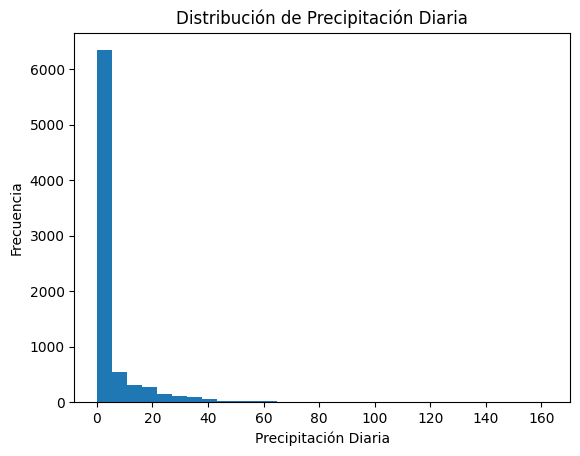

In [193]:
# Variabilidad de 'y'
plt.hist(y, bins=30)
plt.title('Distribución de Precipitación Diaria')
plt.xlabel('Precipitación Diaria')
plt.ylabel('Frecuencia')
plt.show()

**SEPARACION DE DATOS PARA ENTRENAMIENTO**

In [194]:
# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [195]:
# Dividir los datos en conjuntos de entrenamiento y prueba usando X con escalado de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

MODELO REGRESIÓN LINEAL

In [196]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [197]:
# Validación cruzada
scores = cross_val_score(modelo, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Los scores están en negativo, los convertimos a positivo
mean_mse = np.mean(mse_scores)
print(f'Mean MSE from cross-validation: {mean_mse}')

Mean MSE from cross-validation: 74.38128164869798


In [198]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [199]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

In [200]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Coeficiente de determinación (R²): {r2}')

Error cuadrático medio (MSE): 73.04298883601298
Error absoluto medio (MAE): 5.114058235208577
Coeficiente de determinación (R²): 0.3686061838883935


In [201]:
def precision_umbral(y_true, y_pred, umbral=0.1):
    error_absoluto_relativo = np.abs((y_true - y_pred) / y_true)
    precisas = error_absoluto_relativo < umbral
    precision = np.mean(precisas)
    return precision

umbral = 0.1
precision = precision_umbral(np.expm1(y_test), y_pred, umbral)
print(f'Precisión con un umbral del {umbral * 100}%: {precision * 100:.2f}%')

Precisión con un umbral del 10.0%: 0.93%


MODELO Random Forest Regressor


In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [203]:
# Probar con un Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [204]:
# Validación cruzada
scores_rf = cross_val_score(modelo_rf, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores_rf = -scores_rf  # Convertir a positivo
mean_mse_rf = np.mean(mse_scores_rf)
print(f'Mean MSE from cross-validation (Random Forest): {mean_mse_rf}')

Mean MSE from cross-validation (Random Forest): 66.69148085850708


In [205]:
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [206]:
# Realizar predicciones
y_pred_rf = modelo_rf.predict(X_test)


In [207]:
# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Error cuadrático medio (MSE) (Random Forest): {mse_rf}')
print(f'Error absoluto medio (MAE) (Random Forest): {mae_rf}')
print(f'Coeficiente de determinación (R²) (Random Forest): {r2_rf}')

Error cuadrático medio (MSE) (Random Forest): 65.20678216573208
Error absoluto medio (MAE) (Random Forest): 3.816614330218069
Coeficiente de determinación (R²) (Random Forest): 0.43634345083534043


In [208]:
def precision_umbral(y_true, y_pred, umbral=0.1):
    # Evitar división por cero para valores verdaderos iguales a cero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    error_absoluto_relativo = np.abs((y_true - y_pred) / y_true)
    precisas = error_absoluto_relativo < umbral
    precision = np.mean(precisas)
    return precision

In [209]:
# Realizar predicciones con Random Forest
y_pred_rf = modelo_rf.predict(X_test)

In [210]:
# Evaluar precisión con un umbral del 10%
umbral = 0.1
precision_rf = precision_umbral(y_test, y_pred_rf, umbral)
print(f'Precisión con un umbral del {umbral * 100}% (Random Forest): {precision_rf * 100:.2f}%')

Precisión con un umbral del 10.0% (Random Forest): 3.55%
